<a href="https://colab.research.google.com/github/rayeesrafi/Voting-Classifer/blob/main/Randomsearch_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
trn = pd.read_csv('/content/drive/MyDrive/Dataset/kdd.csv')

Mounted at /content/drive


In [ ]:
trn.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
trn.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
trn.nunique()

,0
duration,2981
protocol_type,3
service,70
flag,11
src_bytes,3341
dst_bytes,9326
land,2
wrong_fragment,3
urgent,4
hot,28


In [ ]:
trn.shape

(125973, 42)

In [ ]:
trn.duplicated().sum()

0

In [ ]:
types = trn["labels"].unique()
types
print(len(types))
print(types)

23
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [ ]:
# Get the unique values and their counts
unique_value_counts = trn["labels"].value_counts()

# Print the number of unique values
print(f'Number of unique labels: {len(unique_value_counts)}')

# Print the unique values and their counts
print(unique_value_counts)


Number of unique labels: 23
labels
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [ ]:
types = types[1:]
types

array(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop',
       'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'],
      dtype=object)

In [ ]:
# trn["labels"].replace(to_replace=types,value="attacking", inplace = True)
trn['labels']=trn['labels'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

<ipython-input-12-1fc943e12390>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trn['labels']=trn['labels'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,


In [ ]:
trn.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'trn' is your DataFrame
X = trn.iloc[:, :40]  # Select the first 40 columns
y = trn.iloc[:, -1]   # Select the last column



# Assuming 'tcp' is in a specific column, say 'protocol_type'
label_encoder = LabelEncoder()
X['protocol_type'] = label_encoder.fit_transform(X['protocol_type'])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Use OneHotEncoder to transform all categorical features
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = one_hot_encoder.fit_transform(X.select_dtypes(include=['object']))

# Combine the encoded columns with the rest of your DataFrame
X_numeric = X.select_dtypes(exclude=['object'])
X_final = np.hstack((X_numeric.values, X_encoded))

# Optionally convert back to DataFrame for easier handling
X_final = pd.DataFrame(X_final, columns=list(X_numeric.columns) + list(one_hot_encoder.get_feature_names_out()))


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_final, y)

# Print the new class distribution after applying SMOTE
print('Resampled dataset shape:', Counter(y_res))


Resampled dataset shape: Counter({0: 67343, 1: 67343, 3: 67343, 2: 67343, 4: 67343})


In [ ]:
# You can combine the resampled features and labels into a DataFrame if needed
resampled_trn = pd.DataFrame(X_res, columns=X.columns)
resampled_trn['labels'] = y_res

# Print the number of unique values after resampling
unique_value_counts_resampled = y_res.value_counts()
print(f'Number of unique labels after resampling: {len(unique_value_counts_resampled)}')

# Print the unique values and their counts after resampling
print(unique_value_counts_resampled)

Number of unique labels after resampling: 5
labels
0    67343
1    67343
3    67343
2    67343
4    67343
Name: count, dtype: int64


In [ ]:
trn.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
# Create correlation matrix
corr_matrix = X_final.corr().abs()
corr_matrix

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
duration,1.000000,0.038241,0.070737,0.034878,0.001553,0.009866,0.003830,0.000705,0.009528,0.064218,...,0.034493,0.005336,0.034268,0.539954,0.068182,0.005943,0.003411,0.001148,0.068255,0.005119
protocol_type,0.038241,1.000000,0.000974,0.000608,0.001757,0.169535,0.000965,0.011857,0.003370,0.100920,...,0.039019,0.013973,0.003567,0.017457,0.077123,0.006722,0.003962,0.002460,0.102901,0.005790
src_bytes,0.070737,0.000974,1.000000,0.000204,0.000109,0.000693,0.000059,0.000295,0.000208,0.003353,...,0.002429,0.007609,0.178046,0.000685,0.004800,0.000007,0.000229,0.000682,0.006079,0.000360
dst_bytes,0.034878,0.000608,0.000204,1.000000,0.000069,0.000440,0.000248,0.000344,0.000504,0.002894,...,0.001539,0.000537,0.000141,0.029685,0.003042,0.000147,0.000215,0.000077,0.004509,0.000228
land,0.001553,0.001757,0.000109,0.000069,1.000000,0.001261,0.000109,0.001340,0.000381,0.011402,...,0.004408,0.001579,0.000403,0.001972,0.022781,0.000759,0.000448,0.000278,0.017074,0.000654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
flag_S1,0.005943,0.006722,0.000007,0.000147,0.000759,0.004824,0.000417,0.000797,0.001808,0.052719,...,0.016867,0.006040,0.001542,0.007546,0.033338,1.000000,0.001712,0.001063,0.065329,0.002503
flag_S2,0.003411,0.003962,0.000229,0.000215,0.000448,0.002843,0.000246,0.008963,0.000858,0.033628,...,0.009940,0.003560,0.000909,0.004447,0.019646,0.001712,1.000000,0.000627,0.038499,0.001475
flag_S3,0.001148,0.002460,0.000682,0.000077,0.000278,0.001765,0.000153,0.000190,0.017265,0.019436,...,0.006172,0.002210,0.000564,0.002761,0.012199,0.001063,0.000627,1.000000,0.023906,0.000916
flag_SF,0.068255,0.102901,0.006079,0.004509,0.017074,0.073840,0.006383,0.074924,0.000136,0.641738,...,0.379191,0.135793,0.034668,0.169644,0.749485,0.065329,0.038499,0.023906,1.000000,0.056270


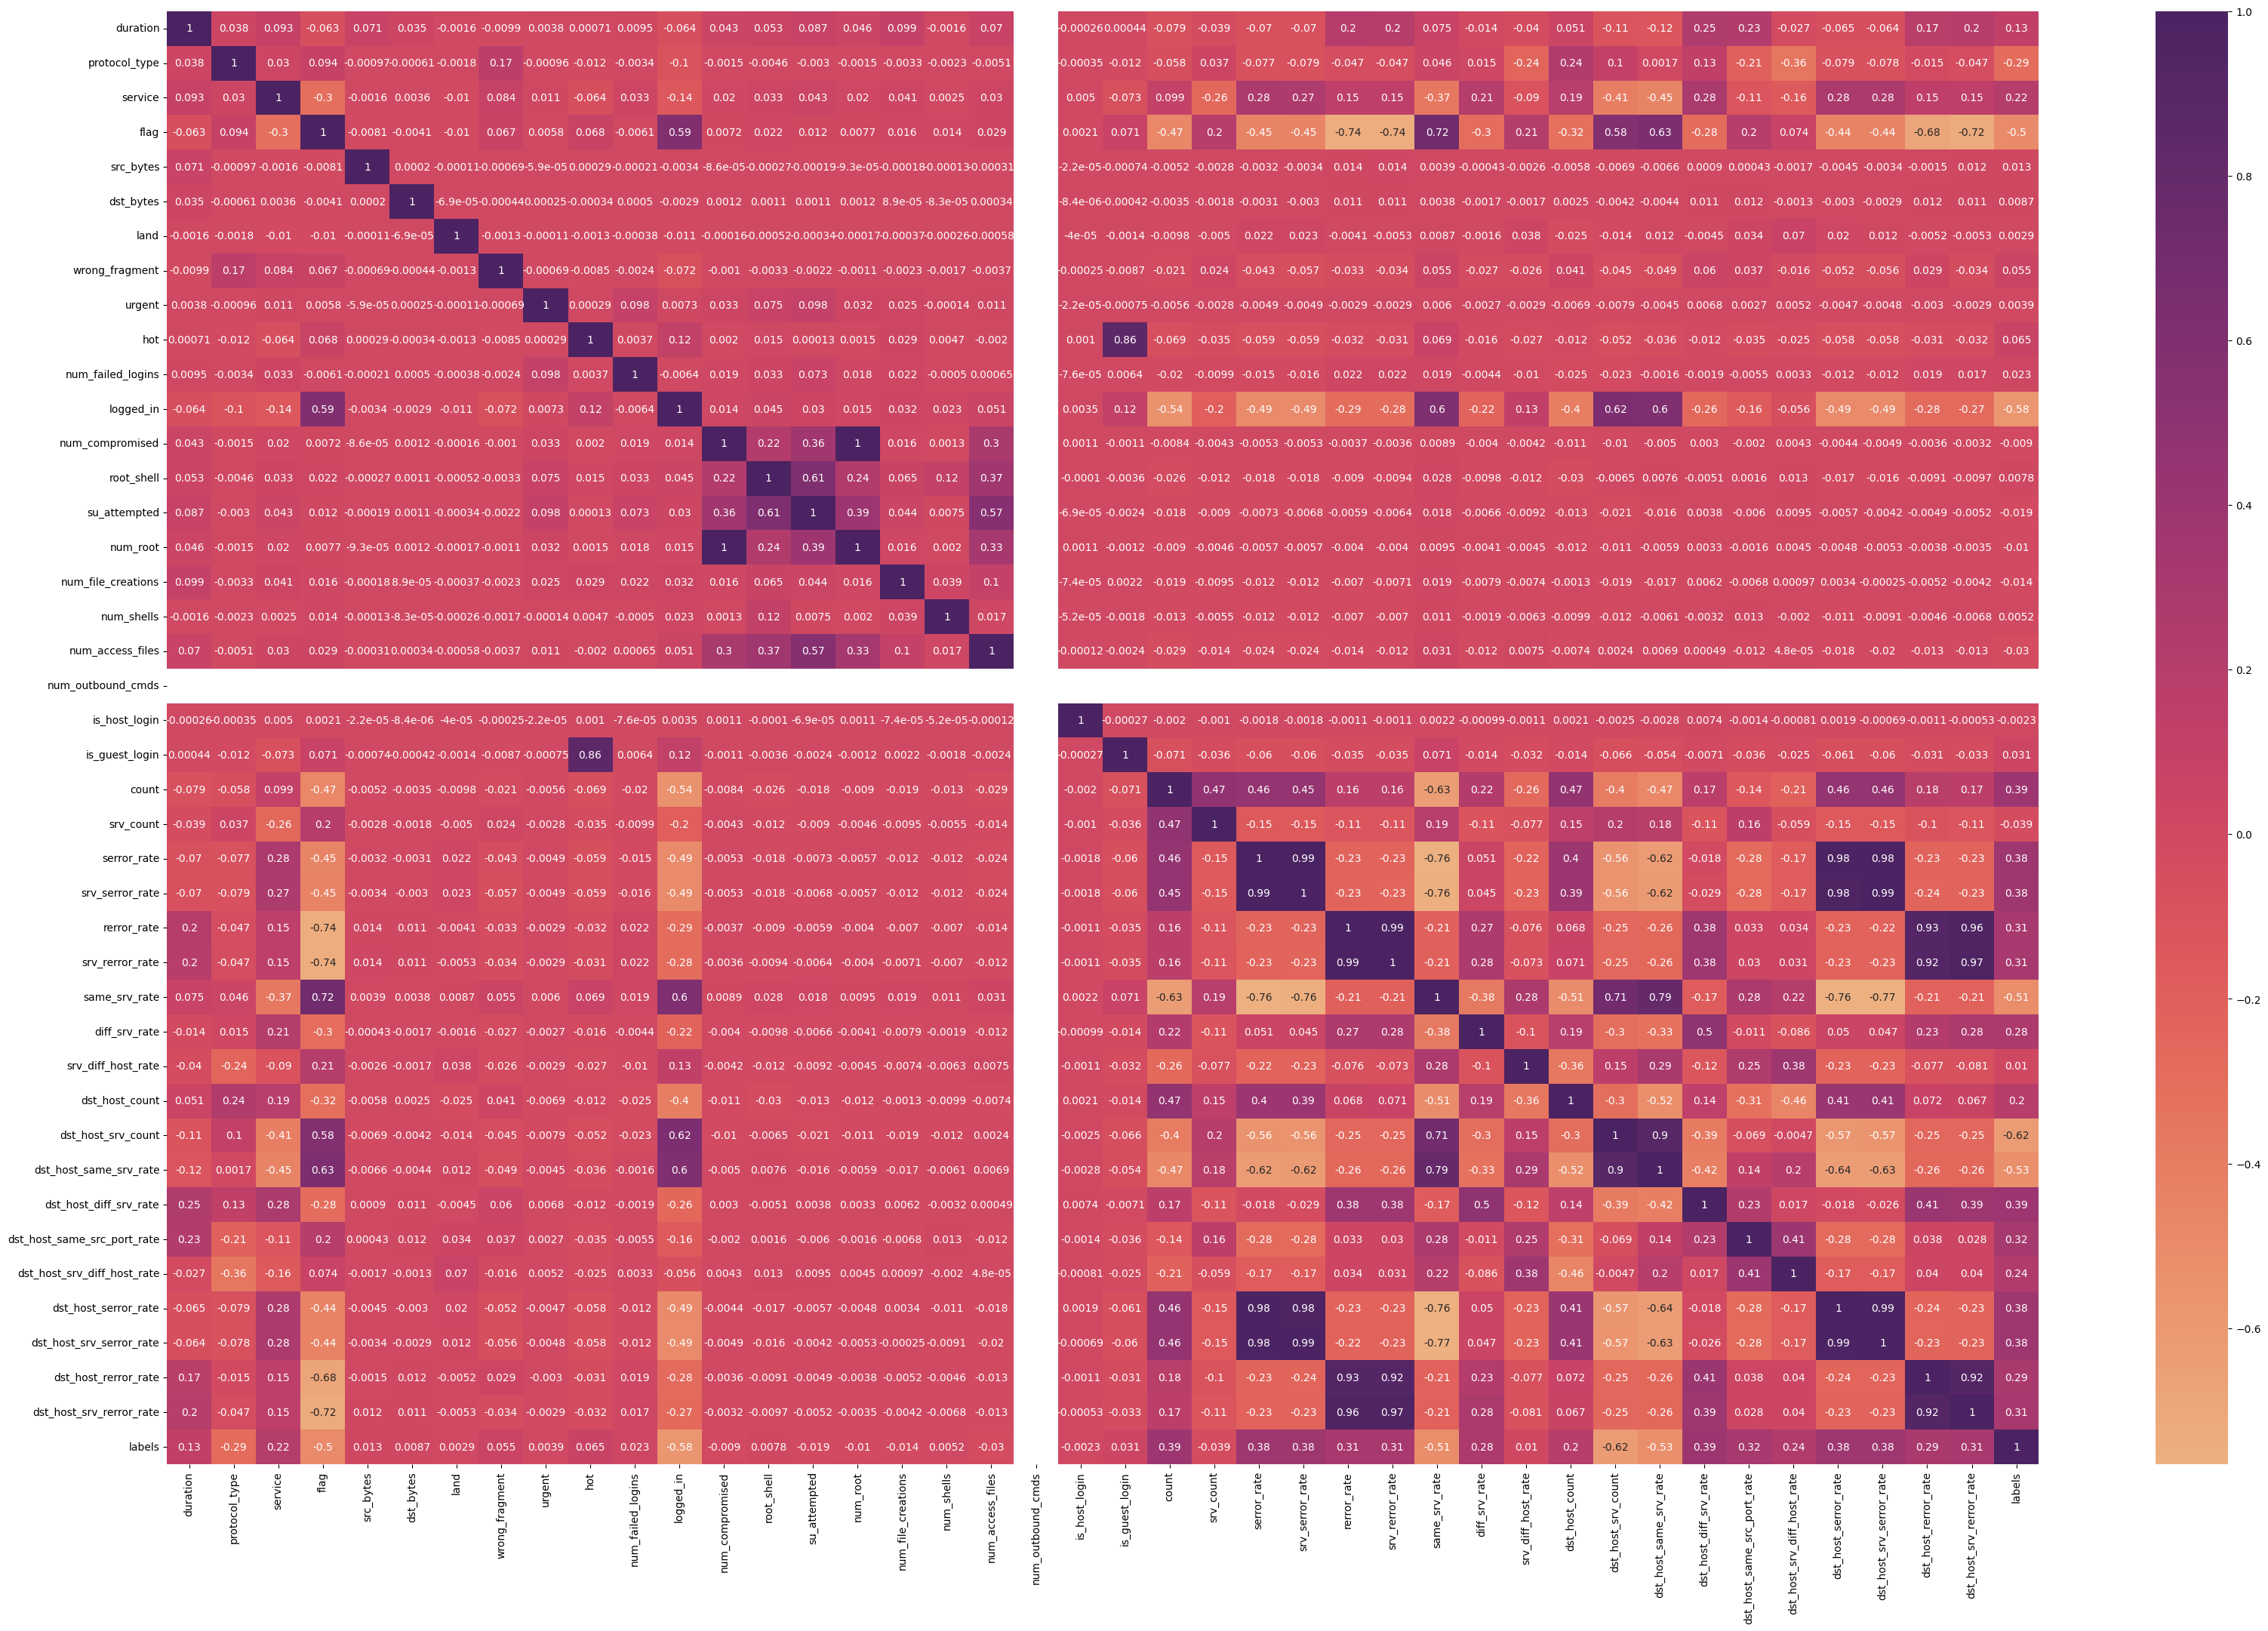

In [ ]:
# Convert 'protocol_type' column to numerical using Label Encoding

label_encoder = LabelEncoder()
trn['protocol_type'] = label_encoder.fit_transform(trn['protocol_type'])

# Convert other categorical features to numerical if necessary
for column in trn.select_dtypes(include=['object']).columns:
    trn[column] = label_encoder.fit_transform(trn[column])

# Now create the heatmap
plt.figure(figsize=(40, 25))
sns.heatmap(trn.corr(), annot=True, cmap='flare')
plt.show()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


In [ ]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'flag_S0']

In [ ]:
# Recalculate correlation matrix on the updated DataFrame trn
corr_matrix = trn.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features from the trn DataFrame
trn.drop(to_drop, axis=1, inplace=True, errors='ignore') # Ignore errors if column is not found

In [ ]:
X_trn = trn.drop(['labels'] , axis = 1).values
Y_trn = trn['labels'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(X_trn, Y_trn, test_size = 0.30)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Assuming X_trn and Y_trn are already defined
x_trn, x_tst, y_trn, y_tst = train_test_split(X_trn, Y_trn, test_size=0.30, random_state=42)


In [ ]:
# Define pipelines for classifiers
from sklearn.ensemble import RandomForestClassifier
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svm', SVC(probability=True, kernel='linear'))])
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
dt_pipeline = Pipeline([('dt', DecisionTreeClassifier())])
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
# Create the voting classifier with pipelines
voting_clf = VotingClassifier(estimators=[
    ('svm', svm_pipeline),
    ('lr', lr_pipeline),
    ('dt', dt_pipeline),
    ('rf', rf_pipeline)
], voting='soft')

In [ ]:
# Define parameter distributions for Randomized Search
param_dist = {
    'svm__svm__C': [0.1, 1, 10],
    'svm__svm__kernel': ['linear', 'rbf'],
    'lr__lr__C': [0.1, 1, 10],
    'lr__lr__solver': ['liblinear', 'lbfgs'],
    'dt__dt__max_depth': [None, 5, 10],
    'rf__rf__n_estimators': [100, 200]
}

In [ ]:
# Perform Randomized Search
from sklearn.model_selection import train_test_split, RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=voting_clf,
                                   param_distributions=param_dist,
                                   n_iter=15,  # Number of iterations
                                   scoring='accuracy',
                                   cv=3,   # cross-validation folds
                                   verbose=3,
                                   random_state=42,
                                   n_jobs=-1)  # Utilize all available processors

# Fit Randomized Search to the data
random_search.fit(x_trn, y_trn)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3,
                   estimator=VotingClassifier(estimators=[('svm',
                                                           Pipeline(steps=[('scaler',
                                                                            StandardScaler()),
                                                                           ('svm',
                                                                            SVC(kernel='linear',
                                                                                probability=True))])),
                                                          ('lr',
                                                           Pipeline(steps=[('scaler',
                                                                            StandardScaler()),
                                                                           ('lr',
                                                                            LogisticRegression())])),
                                                          ('dt',
                                                           Pipeline(steps=[('dt',
                                                                            DecisionTreeClassifier())])),
                                                          ('rf',
                                                           Pipeline(steps=[('scaler',
                                                                            StandardScaler()),
                                                                           ('rf',
                                                                            RandomForestClassifier(random_state=42))]))],
                                              voting='soft'),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'dt__dt__max_depth': [None, 5, 10],
                                        'lr__lr__C': [0.1, 1, 10],
                                        'lr__lr__solver': ['liblinear',
                                                           'lbfgs'],
                                        'rf__rf__n_estimators': [100, 200],
                                        'svm__svm__C': [0.1, 1, 10],
                                        'svm__svm__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
# Extract results
results = random_search.cv_results_

In [ ]:
# Get the best parameters
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'svm__svm__kernel': 'rbf', 'svm__svm__C': 1, 'rf__rf__n_estimators': 200, 'lr__lr__solver': 'liblinear', 'lr__lr__C': 0.1, 'dt__dt__max_depth': None}


In [ ]:
# Use the best estimator
best_voting_clf = random_search.best_estimator_

In [ ]:
# Fit the best model to the training data
best_voting_clf.fit(x_trn, y_trn)

VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm',
                                               SVC(C=1, probability=True))])),
                             ('lr',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('lr',
                                               LogisticRegression(C=0.1,
                                                                  solver='liblinear'))])),
                             ('dt',
                              Pipeline(steps=[('dt',
                                               DecisionTreeClassifier())])),
                             ('rf',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('rf',
                                               RandomForestClassifier(n_estimators=200,
                                                                      random_state=42))]))],
                 voting='soft')

In [ ]:
# Make predictions
y_pred = best_voting_clf.predict(x_tst)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_tst, y_pred)
print(f"Voting Classifier Accuracy after Randomized Search: {accuracy:.4f}")

Voting Classifier Accuracy after Randomized Search: 0.9972


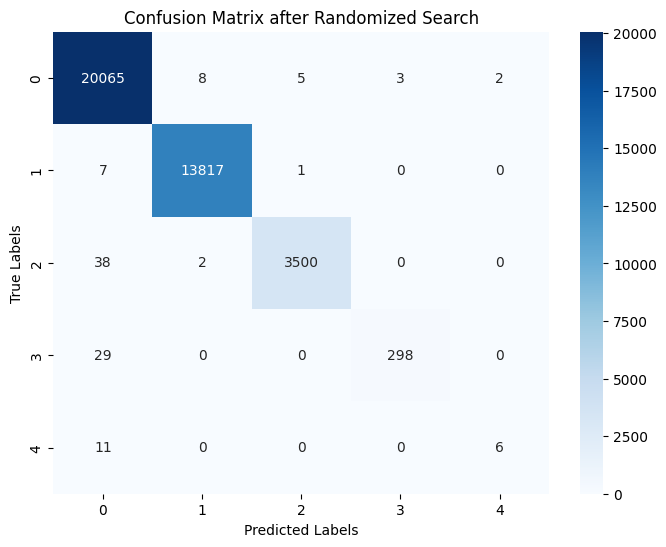


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20083
           1       1.00      1.00      1.00     13825
           2       1.00      0.99      0.99      3540
           3       0.99      0.91      0.95       327
           4       0.75      0.35      0.48        17

    accuracy                           1.00     37792
   macro avg       0.95      0.85      0.88     37792
weighted avg       1.00      1.00      1.00     37792



In [ ]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report # Import classification_report

# Confusion Matrix
cm = confusion_matrix(y_tst, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix after Randomized Search')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nClassification Report:")
print(classification_report(y_tst, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Define the 'classes' variable explicitly
classes = trn['labels'].unique() # Assuming trn is your original DataFrame

y_test_binarized = label_binarize(y_tst, classes=classes)
y_pred_binarized = label_binarize(y_pred, classes=classes)
# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


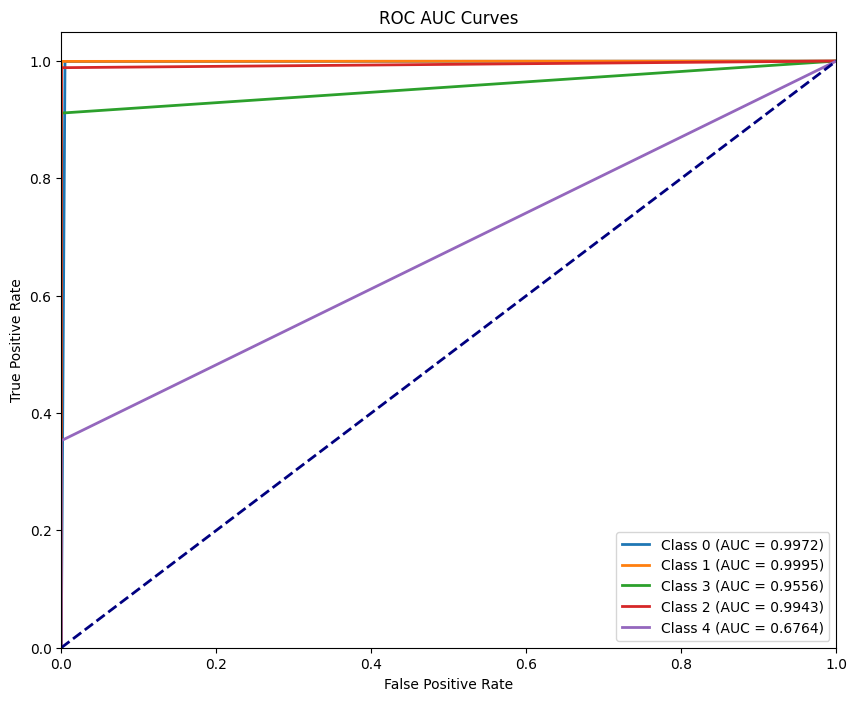

In [ ]:
# Plotting ROC AUC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# A single ROC AUC score for the entire multiclass case:
# The `average` parameter can be adjusted ('macro', 'micro', 'weighted')
roc_auc_score_overall = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted')
print(f'Overall ROC AUC Score: {roc_auc_score_overall:.4f}')

Overall ROC AUC Score: 0.9972
